# Starter: Classification based on the mushroom-dataset
This notebook is about the [mushroom-dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification). In this dataset about 8000 mushrooms are descriped by 23 attributes, the most important of them is called class - a mushroom is either poisened or not (=> edible). The most common task is to train and test a machine-learning algorithm with it.\
In this notebook, the data gets first displayed in different ways, afterwards the data and some modified version is going to run through some binary classifications.

#### Importing libraries
To acces the file, read the database, presenting it and for the most of in this Notebook used methods, you have to import some libraries as in the following. Each method gets explained broadly at its first usage.

In [1]:
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # heatmap
import matplotlib.pyplot as plt # plotting
import matplotlib.colors as mcolors # colouring the diagrams
from math import ceil # rounding
from sklearn.preprocessing import LabelEncoder # transforming letters in numbers
from sklearn.model_selection import train_test_split # splitting data in x,y-test & x,y-train
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    # different classifiers:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import CategoricalNB as CNB
from sklearn.neural_network import MLPClassifier as MLP

#### Import the database
With the library os, you can check whether the given path even leads to a file at all or not. When you're sure that your path leads to the mushrooms.csv file, you can read it and transform it into a dataframe with the function .read_csv(...) from the library pandas (pd).\
The parameter nRowsRead allows you to set the number of data rows that are going to be read from database. If you change it to e.g. 1000, only the first 1000 lines will be read. (If the paramater is null, all lines are going to be read.)

In [2]:
path = "./mushrooms.csv"

print("The path \'" + path + "\' " + ("leads" if os.path.isfile(path) else "doesn't lead") + " to a file.")

nRowsRead = None
data = pd.read_csv(path, nrows = nRowsRead)

data_original = data.copy()
    # usefull to have, maybe the data object will be changed in following code

The path './mushrooms.csv' leads to a file.


## Display the data

#### Showing a part of the database
Sometimes it's usefull to take a look at some rows of the data to know how the data is formatted or which columns exists.\
For this purpose, the .sample() function is very usefull. This function gives you random rows of your dataframe. By giving a number as paramater - here: 5 - you choose how many rows you're gonna get. By setting the parameter random_state to any, you  ensure that you get everytime the same rows when you're running the code.\
It's also important to know that the indices shown in the table under the colum 'index' aren't the indices of the rows in the new dataframe. (These shown indices were the row-indices in the old dataframe.) If you want to see the new ones, you can use the .reset_index() function. 

(In code that displays data, the data_original object is used instead of the normal data object because in some subsequent code cells, the "data" object is changed and no longer contains the original data set if you execute these code cells separately after executing all code cells.)

In [3]:
random_state = 20
data_original.sample(5, random_state = random_state)
#data_original.sample(5, random_state = random_state).reset_index()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4061,e,f,f,n,t,n,f,c,b,n,...,s,w,w,p,w,o,p,n,y,d
7739,p,k,y,y,f,n,f,w,n,w,...,y,y,y,p,y,o,e,w,c,l
7944,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,y,v,l
2952,e,x,f,e,t,n,f,c,b,u,...,s,p,w,p,w,o,p,k,y,d
7619,p,k,s,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,d


#### Showing the frequencies of each elements
Also it's usefull to see how many different items each column has and how often they appear in every column, so you can estimate how diverse values are distributed.\
One way to do this, is the data_original.describe() method. With this method you'll see different stats about each column. (e.g. the most common element and its frequency.)

In [4]:
data_original.describe().T
# .T at the end turns output into a better format

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


A similiar way to see such stats is plotting thesm with the matplotlib.pyplot library. With the following function you can plot the frequency of each element in a bar chart for each column.

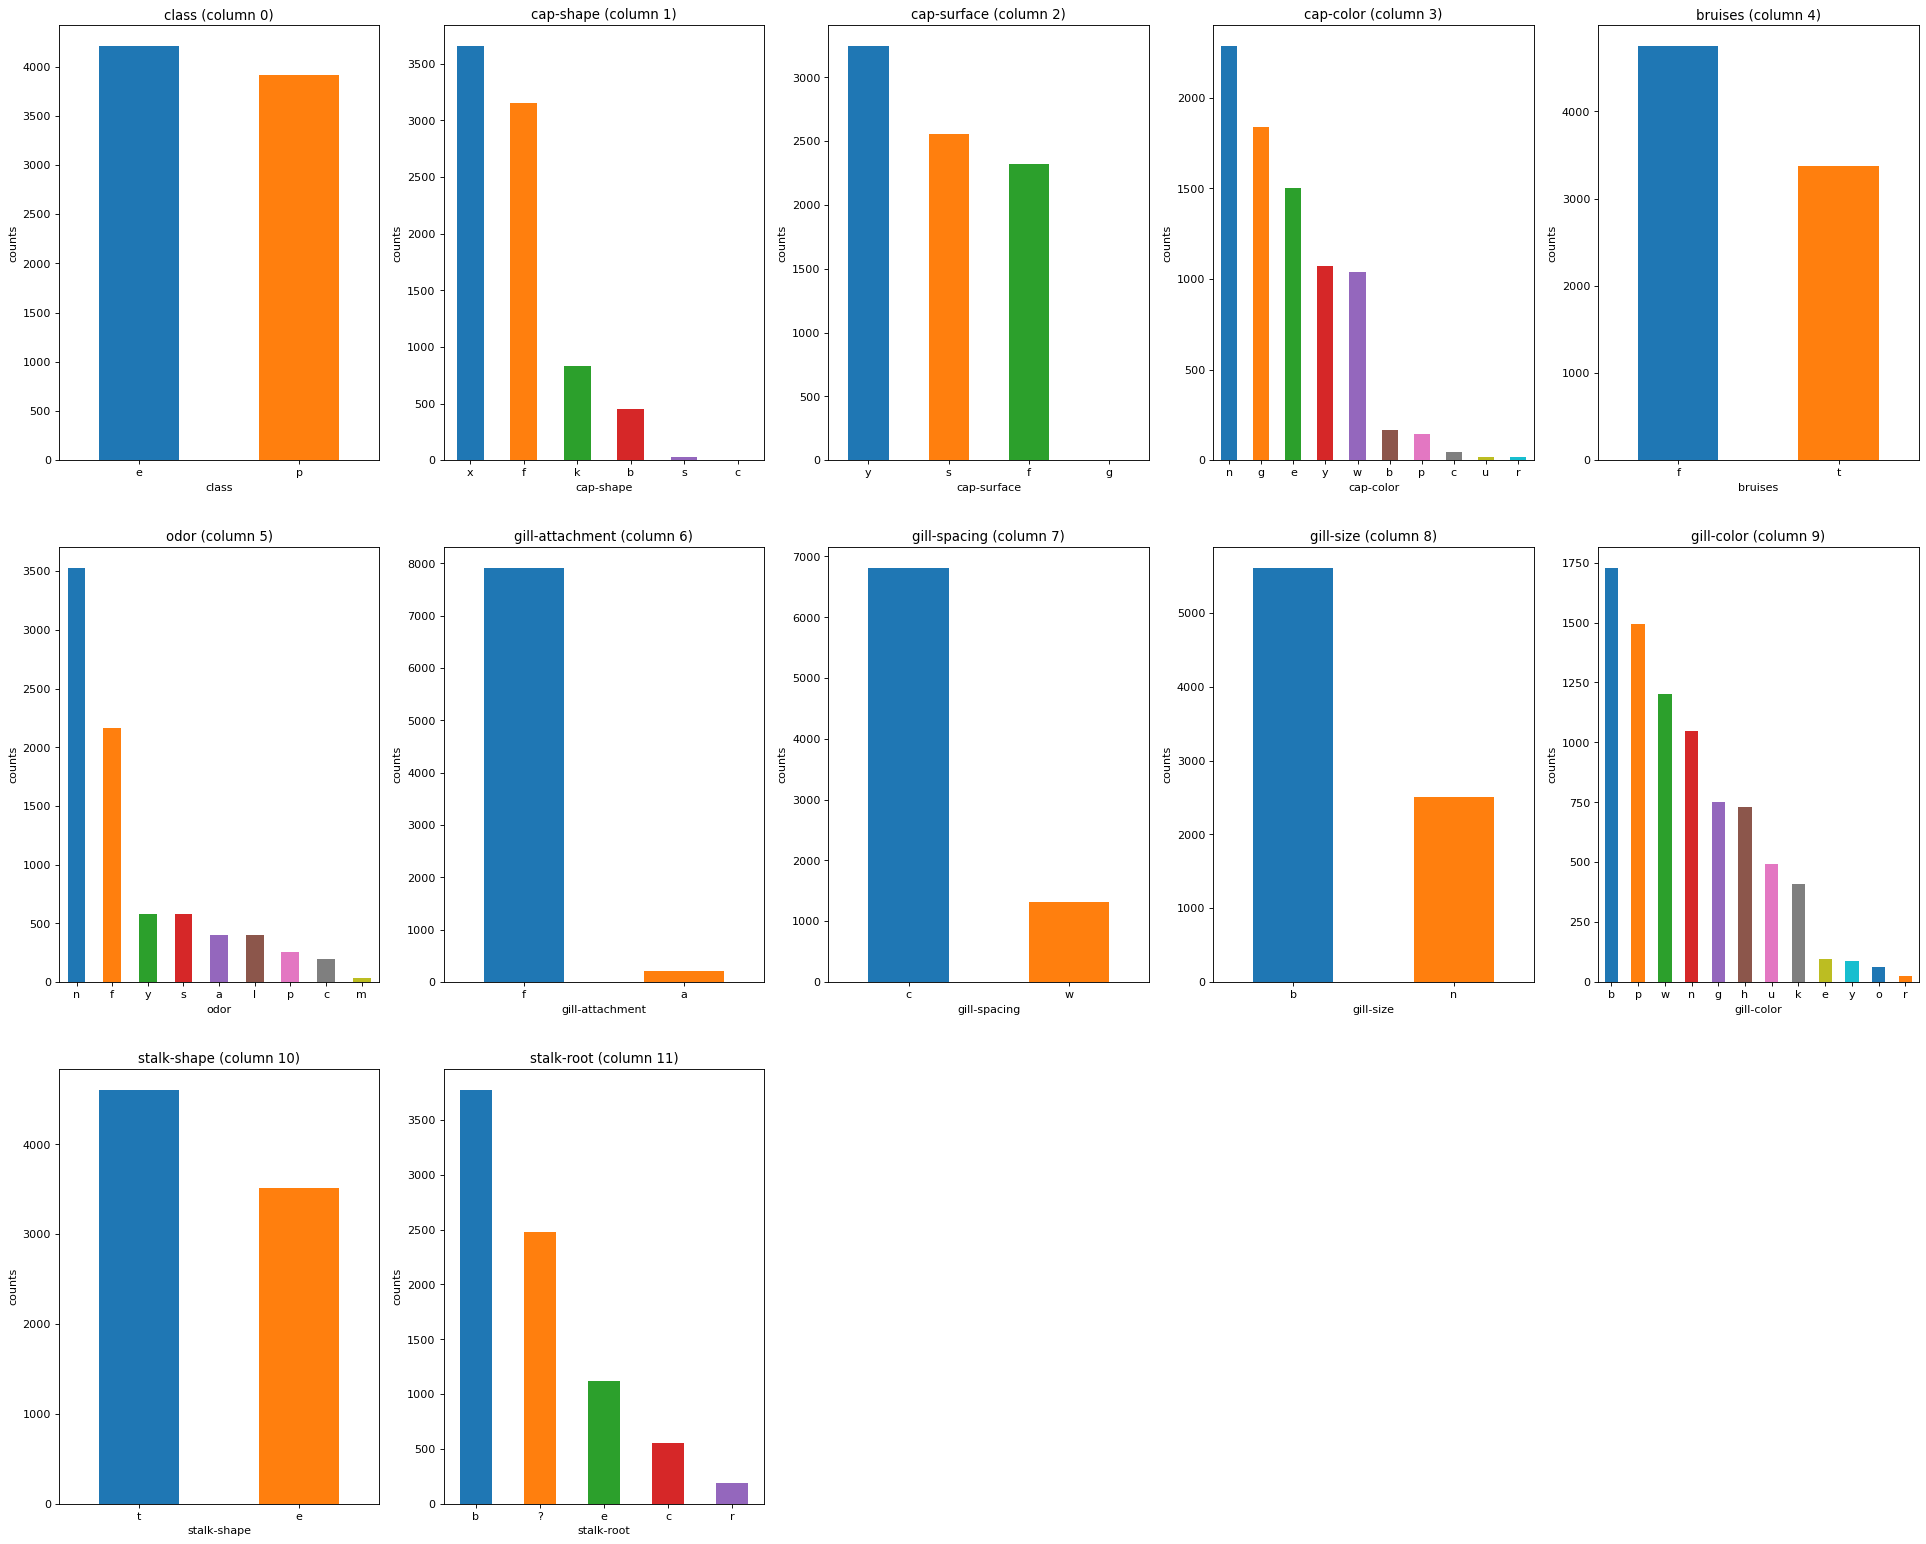

In [5]:
def plotPerColumnDistribution(df, nGraph, nGraphPerRow):
    """ 
    displays a bar chart for each column showing the frequencies of all elements in the respective column 
  
    Parameters
    ------------
        df:
            the dataframe which contains the presented columns 
        nGraph:
            how many columns will be displayed
        nGraphPerRow:
            how many bar charts will be displayed in one row
    Return
    -----------
        image_bar_charts:
            displays a png-image containg the bar charts in a table-like format
    """
    nunique = df.nunique()
        # gives a list of how many different elements each column has
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
        # For displaying purposes, only columns that have between 1 and 50 unique values are picked
    
    
    columnNames = list(df)

    nGraphShown = min(len(df.columns), nGraph)
        # if nGraph is higher then the actuall amount of columns, of course, only these columns can be displayed

    nGraphRows = ceil(nGraphShown/ nGraphPerRow)
        # calculate how many rows you're gonna need for displaying all bar-charts
    
    
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRows), dpi = 80, facecolor = 'w', edgecolor = 'k')
        # set the "background" settings of the diagram 
        # e.g. the size of each diagram, size of all diagrams in total or the backroung color
    
    for i in range(nGraphShown):
        plt.subplot(nGraphRows, nGraphPerRow, i+1)
            # activate a new/ the current bar chart
        
        currentColumnName = columnNames[i]
    
        valueCounts = df[currentColumnName].value_counts()
            # gives a list of all elements and its frequencies in the current column
                        
        valueCounts.plot.bar(color = mcolors.TABLEAU_COLORS) 
            # parameter color -> setting the colours of the bars to blue, orange, green, ...
        
        plt.ylabel('counts')
        plt.xticks(rotation = 0)
        plt.title(f'{currentColumnName} (column {i})')
            # modify how each bar chart is gonna be labeled e.g. the title of the bar chart
    plt.show()

plotPerColumnDistribution(data, 12, 5)
    # plotting 12 columns/ bar-charts while 5 bar charts are in one row

## Running the data through classification algorithms
#### Formatting the data
To run the data trough the classification algorithms of sklearn, you must first transform it from characters/Strings to numbers .\
The simplest solution for this is using the LabelEncoder. This tool changes each letter in a colum of the dataset to a number, or more precisly, to the place in the alphabetic order of all leters of that column. You can see below how the tansformation process works in the first 5 columns and compare the sample of transformed data with the same sample in code cell 3.

In [6]:
label_enc = LabelEncoder()
    # creating an LabelEncoder object

mappings = list()
    # indicate python that mappings is a list so you can append objects afterwards

for i in range(len(data.columns)): # going trough all columns
    data[data.columns[i]] = label_enc.fit_transform(data_original[data_original.columns[i]])
        # transform the current column letter to number
    encryption_list = list({str(index) + " -> " + str(label) for index, label in enumerate(label_enc.classes_)})
        # save the encryption (, which letter each number stands for,) in a list
    encryption_list.sort()
        # this way the list is sorted alphabetic/ numeric order
    mappings.append(data_original.columns[i].ljust(11) + ": "+ str(encryption_list))
        # save the current collumn and the encryption list


print("\n".join(mappings[:5]))
    # print the first 5 lines of the column+encryption list
data.sample(5, random_state=random_state)

class      : ['0 -> e', '1 -> p']
cap-shape  : ['0 -> b', '1 -> c', '2 -> f', '3 -> k', '4 -> s', '5 -> x']
cap-surface: ['0 -> f', '1 -> g', '2 -> s', '3 -> y']
cap-color  : ['0 -> b', '1 -> c', '2 -> e', '3 -> g', '4 -> n', '5 -> p', '6 -> r', '7 -> u', '8 -> w', '9 -> y']
bruises    : ['0 -> f', '1 -> t']


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4061,0,2,0,4,1,5,1,0,0,5,...,2,7,7,0,2,1,4,3,5,0
7739,1,3,3,9,0,5,1,1,1,10,...,3,8,8,0,3,1,0,7,1,2
7944,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,8,4,2
2952,0,5,0,2,1,5,1,0,0,9,...,2,6,7,0,2,1,4,2,5,0
7619,1,3,2,2,0,8,1,0,1,0,...,2,7,7,0,2,1,0,7,4,0


Futhermore, you have to split the data in different parts. To understand what's the meaning of each part, you must know that classification algorithms have x-data and y-data: In a simple way, the x-data is the input of every run of the algorithm and the y-data is the output. In this case, your y-data is the "class" column, because you want to predict the class (poisoned or not) of the mushrooms, and the x-data is represented by the other 22 columns (attributes of the mushrooms).\
In addition, sklearn wants also to have the data splitted in train and test data. With the train data, the machine tries to understand hidden connections, which lead to a certain result in the y-data, in the x-data; the machine improves its skill. After completing the training, you can prove the skills of the machine with the test data: You'll check for matches between the y-values the algorithm predicted and the actual y_test data.

In [7]:
x = data.drop("class", axis=1)
    # all of the 'data' dataframe except the "class" column
y = data['class']
    # only the "class" column of the 'data' dataframe

test_size = 0.5
    # the machine gets 50% of the data to train and 50% to test
    
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = test_size, random_state = random_state)
data_splitted = x_train, x_test, y_train, y_test
    # one line redundant, but this way easier to understand & used later

#### Defining a analysis method
In the following chapters, some classfication algorithms are going to run trough the data. To simplify this process and the code, it's usefull to define a class/method which do this so you can input a algorithm. 

In [8]:
class Classification_result:
    columns = ['Predicted Edible', 'Predicted Poisened']
    index=['True Edible', 'True Poisened']
    
    def __init__(self, model, data_splitted, name=None):
        """ 
        trains and tests a classification model, saves a confusion matrix as attribute
              
        Parameters
        ------------
            model:
                a model/ algorithm for classification e.g. SVC()
            data_splitted:
                a list of the data to analyse splitted in 4 parts: x_train, x_test, y_train, y_test
            name:
                the name of the model, may needed for comparing the result of different algorithms afterwards; can be left out
        """
        self.name = name
        
        self.x_train, self.x_test, self.y_train, self.y_test = data_splitted
                # saving the parts of the data as own objects
        model.fit(self.x_train, self.y_train)
                # training the machine with x_train & y_train
        self.y_predict = model.predict(self.x_test)
                # guess of the machine for x_test values
        self.cm = np.array(confusion_matrix(self.y_test, self.y_predict, labels=[0,1]))
                # saving the diffences between in y_test and y_predict in a confusion matrix    
        self.confusion = pd.DataFrame(self.cm, index=Classification_result.index, columns=Classification_result.columns)    
                # resaving the confusion matrix in a dataframe so you can easily see what does the values mean (Predicted Edible/Poisened; actually Edible/Poisened)
        self.accuracy = accuracy_score(self.y_test, self.y_predict)
                # saving the ratio of correctly guessed mushrooms as an attribute of the classifaction_result object
    
    
    def heatmap(self):
        """ 
        presents the confusion matrix, in such diagrams the height of a numbers gets represented by a colour
        Parameters
        ------------
            df:
                the dataframe which contains the presented columns 
            nGraph:
                how many columns will be displayed
            nGraphPerRow:
                how many bar charts will be displayed in one row
        Return
        -----------
            image_bar_charts:
                displays a png-image containg the bar charts in a table-like format
        """
        annot = True
            # showing the numbers in the heatmap instead of empty fields
        fmt = 'd'
            # displaying the numbers in their whole decimal form instead of e.g 2.1e+03

        plt.figure(figsize = (6,5))
            # scaling the size of the heatmap
        return sns.heatmap(self.confusion, annot=annot, fmt=fmt)

#### Running the data on SVC (super vector classification)
Super-Vector-Classification is a algorithm for (binary) classification. Because we created already a method to train/test this algorithm we just have to create an object of the SVC model and paste it the constructor of the class. Afterwards we can access the confusion matrix to display the results in form of a confusion matrix.\
In such a table, you can see how man mushrooms were predicted from the SVC algorithm as Edible/Poisened and what class they had actually.

In [9]:
svc_model = SVC()
    # creating the SVC machine
svc = Classification_result(svc_model, data_splitted, "SVC")
svc.confusion

,Predicted Edible,Predicted Poisened
True Edible,2109,4
True Poisened,46,1903


##### Displaying a heatmap
If you want to have such a confusion matrix as above in a more visualized form, you can display it as a heatmap by call up the .heatmap() function. It's structered the same as the table above, but in a heatmap, the cells of the table are colored according to height of the number. In this way, it's easier to compare the scale of the numbers and their distances. You can see easily that the data was mostly predicted correct.

<Axes: >

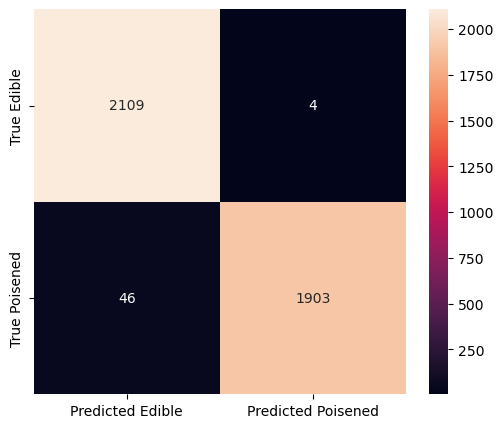

In [10]:
svc.heatmap()

#### Running the data on KNC (k-nearest neighbor classification)
You can also run this data on the KNC algorithm, a different classifier. Here you notice why the classification_result is usefull: you can easily do the same analysis like of the SVC model.\
(There isn't going to be a heatmap for the KNC, because it needs quite much space in this notebook and it's showing not new data or results; but if you want to have one, feel free to create your own.)

In [11]:
knc_model = KNC()
knc = Classification_result(knc_model, data_splitted, "KNC")
knc.confusion

,Predicted Edible,Predicted Poisened
True Edible,2104,9
True Poisened,8,1941


#### Running the data on other classifiers
There are many more classification algorithms which you can run the data through like shown with the SVC and KNC algorithm. In the following code cells the data is going to run through some of them: the decision tree classifier (short DTC), the Categorical Naive Bayes algorithm (CNB) and a mulit-layer percpetron (short MLP), a type of neural networks.

In [12]:
dtc = Classification_result(DTC(), data_splitted, "DTC")
dtc.confusion

,Predicted Edible,Predicted Poisened
True Edible,2113,0
True Poisened,0,1949


In [13]:
cnb = Classification_result(CNB(), data_splitted, "CNB")
cnb.confusion

,Predicted Edible,Predicted Poisened
True Edible,2098,15
True Poisened,186,1763


In [14]:
mlp = Classification_result(MLP(), data_splitted, "MLP")
mlp.confusion

,Predicted Edible,Predicted Poisened
True Edible,2113,0
True Poisened,0,1949


#### Comparing the different algorithms
Now you can compare the results after running the SVC algorithm, the KNC algorithm and the DTC algorithm, but you can do this in different ways.\
The most simple one is to compare the accuracy of the models.

In [15]:
all_models = [svc, knc, dtc, cnb, mlp]
    # all models in a list
accuracies = [(model.name, model.accuracy) for model in all_models]
    # a list of (touples of) the name and accuracy of each model
accuracies.sort(key=lambda a: a[1], reverse = True)
    # sort the models by their accuracies (reversed = True -> accuracy 1 is on the top)
print("\n".join([str(index[0]) + " -> " + str(round(index[1]*100,2)) + " %" for index in accuracies]))
    # print them in special format (each in a new line, " -> " between name and accuracy, accuracy in percent rounded on 2 digits)


DTC -> 100.0 %
MLP -> 100.0 %
KNC -> 99.58 %
SVC -> 98.77 %
CNB -> 95.05 %


Already here you can see that the DTC and MLP algorithms are the best with an accuracy of 100% (which means that all mushrooms were predicted edible or poisened in the right way).\n
Nevertheless, there's another way to display the differences of the results: using bar charts like in code cell 5. You can implement it like in the following:

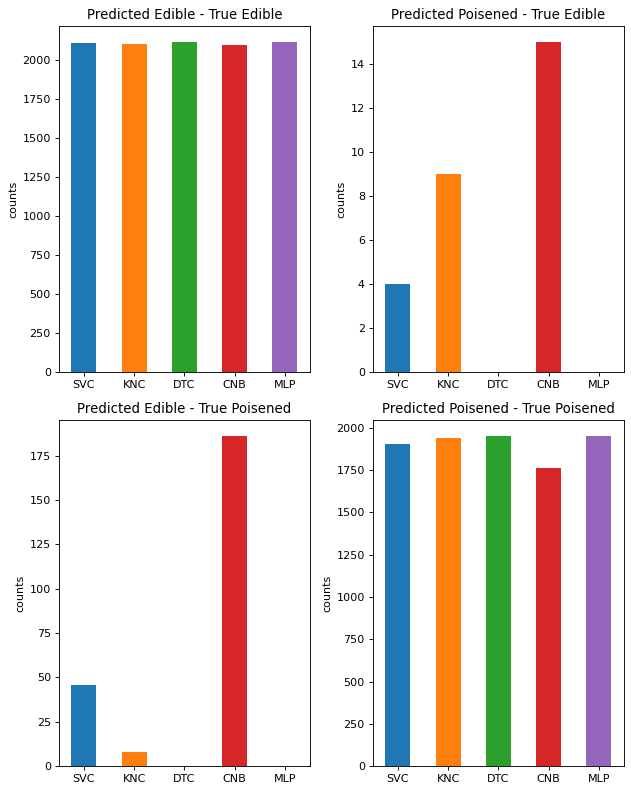

In [16]:
fig = plt.figure(num = None, figsize = (8, 10), dpi = 80, facecolor = 'w', edgecolor = 'k')
    # settting the "background" settings of the diagram 
    # like size of each diagram, size of all diagrams in total or the backroung color    
indices = [(0,0), (1,0), (0, 1), (1,1)]
    # all indices of the confusion matrix in a list so it's easier to go through the cells

titles = [Classification_result.columns[index[0]] + " - " + Classification_result.index[index[1]] for index in indices]
    # titles (e.g. "Predicted Poisened - True Edible") in a list parallel to indices

names = [model.name for model in all_models]
    # names of all models

for i in range(len(indices)):        
    plt.subplot(2, 2, i+1)  
        # activate a new/ the current bar chart
    
    d = { model.name : model.cm[indices[i][1]][indices[i][0]] for model in all_models }
        # saving the results of all models in the current cell
        
    valueCounts = pd.Series(data=d, index=names)
        # resaving the results as Series
                
    valueCounts.plot.bar(color=mcolors.TABLEAU_COLORS)
        # plot the results
        
    plt.ylabel('counts')
    plt.xticks(rotation = 0)
    plt.title(titles[i])
        # modify how each bar chart is gonna be labeled e.g. the title of the bar chart

fig.tight_layout()
    # after execute this method, the bar charts and its labels don't overlap on each other
plt.show()

In these bar graphs, it is easy to see that the CNB model predicts mushrooms incorrectly most often. In particular, the "Predicted Edible - True Poisened" field shows an anomaly, CNB made this error about four times more often than the second worst algorithm, SVC.\
Moreover, from the "Prediction edible - true edible" plot, one can conclude that the CNB model is not the best model for the use in the real world, because if a person eats a mushroom of this type, the person may get sick or even die while the other plot don't lead to dangerous consequences.

### Run modified data through the algorithms
Apart from this, it's also an interesting process to change the data, e.g. modifying the lines that will be read. After this, the models have may another result. However, you must be careful not to change the data itself, as this can lead to so many differences that you can no longer meaningfully compare the results.
#### Using less lines of data
One example of changing the data is to modifie the amount of lines that will be read by the model, e.g. read only 1000 lines. Afterwards the shortened data is going to run through a classifier, in this case the SVC as the second worst model of the above.

In [17]:
lines_amount = 1000
data_llines = data.head(lines_amount)
    # saving the shortened data in a new object
    
x = data_llines.drop("class", axis=1)
y = data_llines['class']
test_size = 0.5
data_splitted = train_test_split(x,y, test_size = test_size, random_state = random_state)
    # copied from code cell 7
    
llines = Classification_result(SVC(), data_splitted)
llines.confusion

,Predicted Edible,Predicted Poisened
True Edible,436,0
True Poisened,0,64


By analyzing this confusion matrix, you can assume that a SVC model has an accuracy of 100% but the output from code cell 9, also a confusion matrix from the SVC model, shows that this model makes some mistakes. This proves that you the ability to rate and to analyze a model reasonalbe increases with the amount of data given to the model.
#### Using less columns of data
Another possible way to modify the data is to change the columns that will be read for the analysis which also means that the models gets less training data. To implement this, it's usefull to have a method which returns an classification result only for the columns you indicated.

In [18]:
def analyse_specialColumns (columns):
    """ 
        run the data, but only the given columns of it, through the DTC model
        
        Parameters
        ------------
            columns:
                these columns is going to represent all of the data, other columns will be removed
        Return
        -----------
            classification_result of DTC model:
                the Classification_result of running the data through the model
        """
    y = data['class']
        # the y-data for the model which means the results of predictions
    x = data[columns]
        # the x-data for the model which the predictions are based on -> only the given columns of data
            
    data_splitted = train_test_split(x,y, test_size = 0.5, random_state = random_state)
        # splitting the data in 4 parts (cp. code cell 8)

    classification = Classification_result(DTC(), data_splitted)
        # the result of running the data through the DTC model
    return classification

Now, you can either remove random columns or remove some special columns. Here, we're gonna sort the columns according to how many different elements are contained in each column, it was already shown in the output of code cell 4 & 5. One the one hand, we're going to have the 11 columns with the lowest amount of different elements, on the other hand the other 11 columns with highest amount of different elements. In the two code cells after, you can see in the output which columns are in each section and what are the results after running the part of the data through the DTC model.

In [19]:
nunique = data.drop("class", axis=1).nunique()
    # cp. to code cell 5
nunique = nunique.sort_values()
    # sort the series so the columns with few different elements are at index 0
columns_mostsame = nunique[:11]
    # saving the first half of the list (few different elements)
columns_mostdifferent = nunique[11:]
    # saving the second half of the list (many different elements)
print("splitted the data in two parts")

splitted the data in two parts


In [20]:
print("few different elements: " + "; ".join(i + "(" + str(v) + ")" for i, v in columns_mostsame.items()))
    # print the names of the columns in the first half and the amount of different elements in each
result = analyse_specialColumns(columns_mostsame.index)
    # result of the model-analysis with the first half of columns
result.confusion
    # the confusion matrix of the model-analysis result

few different elements: veil-type(1); bruises(2); gill-attachment(2); gill-spacing(2); gill-size(2); stalk-shape(2); ring-number(3); cap-surface(4); veil-color(4); stalk-surface-above-ring(4); stalk-surface-below-ring(4)


,Predicted Edible,Predicted Poisened
True Edible,2102,11
True Poisened,58,1891


In [21]:
    # same as code cell above, but with the second half of data (many different elements)
print("many different elements: " + "; ".join(i + "(" + str(v) + ")" for i, v in columns_mostdifferent.items()))      
result = analyse_specialColumns(columns_mostdifferent.index)
result.confusion

many different elements: stalk-root(5); ring-type(5); cap-shape(6); population(6); habitat(7); stalk-color-below-ring(9); odor(9); spore-print-color(9); stalk-color-above-ring(9); cap-color(10); gill-color(12)


,Predicted Edible,Predicted Poisened
True Edible,2113,0
True Poisened,8,1941


These results show something interesting: While the algorithm misidentifies about 70 mushrooms when only the data from the columns with the 11 lowest amount of different elements are run through, the algorithm still correctly identifies all mushrooms when the data from the columns with the 11 highest amount of different elements are run through.\ap
However, there is an explanation for why the results are different: If you are familiar with mathematics, you probably know that the greater the number of possibilities for a given attribute, the more accurately each mushroom can be described (e.g., 6 different possibilities to describe the "cap shape"). With this background, the classifier can more easily search for combinations of attributes that lead to a poisoned mushroom, and much more easily predict whether or not a mushroom is poisoned.
### Conclusion
In conclusion, in this notebook you've learned some methods for analyzing a dataset and testing different classification models. Please keep in mind that this code was written only by a beginner and for beginners and does not contain any high quality programming tricks or methods. Nevertheless, feel free to use, modify or learn from the code in this notebook.